# @WeRateDogs Twitter Data Wrangling

## Table of Contents

- [Introduction](#Intro)
- [Gathering Data](#step1)
- [Assessing Data](#step2)
- [Cleaning Data](#step3)
- [Analysis and Visualization](#step4)
- [Insights](#insights)


<a id='Intro'></a>
## Introduction

I will be wrangling, analyzing and visualizing the dataset gotten from a twitter archive @WeRateDogs. <br>
WeRateDogs is a twitter page that rates people's post about their dogs. Generally, The rate is over 10 but as accepted by the community, people are allowed to give a rating more than 10.<br> 
This project will cover the gathering, assessing, cleaning, analysis and visualization to test my data wrangling skills and to see the insights we can gain from this data.


---

<a id='step1'></a>
## Step 1 : Gathering Data

In [1]:
import numpy as np
import pandas as pd
import tweepy
import os
import json
import requests
import datetime

In [2]:
#Reading the twitter archived file into a dataframe called "twt_df"
twt_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#checking the dataframe
twt_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twt_df.shape

(2356, 17)

In [5]:
twt_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
fname = 'images_prediction.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.isfile(fname):
    response = requests.get(url)
    with open(fname, mode='wb') as file:
        file.write(response.content)


In [3]:
img_df = pd.read_csv('images_prediction.tsv', sep='\t')

In [9]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
import tweepy

consumer_key = 'USED_AND_REMOVED'
consumer_secret = 'USED_AND_REMOVED'
access_token = 'USED_AND_REMOVED'
access_secret = 'USED_AND_REMOVED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [32]:
#for ids in twt_df.tweet_id:
#    print(ids)
#    response = api.get_status(ids, tweet_mode='extended')
#    info = response._json
#    print(info)
#    break

892420643555336193
{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended

In [35]:
# Querying the Twitter IDs
number = 0
data = []
errors = {}

#Naming the file where we will write the tweets JSON data to
tweet_json = 'tweet_json.txt'

#Creates the file if it does not exist and pass if does
if not os.path.isfile(tweet_json):
    open(tweet_json, 'w').close()

SEND_API_REQUEST = True

if SEND_API_REQUEST:
    for ids in twt_df.tweet_id:
        try:
            # Increase the tweet counting by one
            number += 1
            
            #This will show when the query starts
            print('.'*25)
            print('{} started at {}. Tweet_id -> {}'.format(number, datetime.datetime.now().time(), ids))

            # Get request response
            response = api.get_status(ids, tweet_mode='extended')
            info = response._json

            # Append to 'tweet_json.txt' file
            data.append(info)
            with open(tweet_json, 'w') as file:
                json.dump(data, file)

            #This will show when the query ends
            print('{} completed at {}'.format(number, datetime.datetime.now().time()))


        except Exception as e:
            # Record exceptions
            print(' -> {} Error caught at {}'.format(number, datetime.datetime.now().time()))
            errors[str(ids)] = str(e)

.........................
1 started at 00:35:02.012223. Tweet_id -> 892420643555336193
1 completed at 00:35:03.322357
.........................
2 started at 00:35:03.324762. Tweet_id -> 892177421306343426
2 completed at 00:35:04.634122
.........................
3 started at 00:35:04.634122. Tweet_id -> 891815181378084864
3 completed at 00:35:05.829317
.........................
4 started at 00:35:05.829317. Tweet_id -> 891689557279858688
4 completed at 00:35:07.497406
.........................
5 started at 00:35:07.516418. Tweet_id -> 891327558926688256
5 completed at 00:35:08.622747
.........................
6 started at 00:35:08.622747. Tweet_id -> 891087950875897856
6 completed at 00:35:09.561206
.........................
7 started at 00:35:09.570672. Tweet_id -> 890971913173991426
7 completed at 00:35:10.305455
.........................
8 started at 00:35:10.305455. Tweet_id -> 890729181411237888
8 completed at 00:35:11.822342
.........................
9 started at 00:35:11.822342. 

69 completed at 00:36:25.190464
.........................
70 started at 00:36:25.194511. Tweet_id -> 879050749262655488
70 completed at 00:36:26.191512
.........................
71 started at 00:36:26.191512. Tweet_id -> 879008229531029506
71 completed at 00:36:27.301045
.........................
72 started at 00:36:27.301045. Tweet_id -> 878776093423087618
72 completed at 00:36:28.475081
.........................
73 started at 00:36:28.475081. Tweet_id -> 878604707211726852
73 completed at 00:36:29.343965
.........................
74 started at 00:36:29.343965. Tweet_id -> 878404777348136964
74 completed at 00:36:30.322543
.........................
75 started at 00:36:30.322543. Tweet_id -> 878316110768087041
75 completed at 00:36:31.769795
.........................
76 started at 00:36:31.769795. Tweet_id -> 878281511006478336
76 completed at 00:36:33.211561
.........................
77 started at 00:36:33.211561. Tweet_id -> 878057613040115712
77 completed at 00:36:34.696902
........

137 completed at 00:38:11.998161
.........................
138 started at 00:38:11.998161. Tweet_id -> 866094527597207552
138 completed at 00:38:13.176528
.........................
139 started at 00:38:13.176528. Tweet_id -> 865718153858494464
139 completed at 00:38:14.375384
.........................
140 started at 00:38:14.375384. Tweet_id -> 865359393868664832
140 completed at 00:38:15.750605
.........................
141 started at 00:38:15.750605. Tweet_id -> 865006731092295680
141 completed at 00:38:17.115766
.........................
142 started at 00:38:17.116219. Tweet_id -> 864873206498414592
142 completed at 00:38:19.640864
.........................
143 started at 00:38:19.640864. Tweet_id -> 864279568663928832
143 completed at 00:38:20.913070
.........................
144 started at 00:38:20.913070. Tweet_id -> 864197398364647424
144 completed at 00:38:22.522727
.........................
145 started at 00:38:22.522727. Tweet_id -> 863907417377173506
145 completed at 00:38:2

204 completed at 00:39:33.429105
.........................
205 started at 00:39:33.429105. Tweet_id -> 852936405516943360
205 completed at 00:39:34.754460
.........................
206 started at 00:39:34.754460. Tweet_id -> 852912242202992640
206 completed at 00:39:36.133519
.........................
207 started at 00:39:36.133519. Tweet_id -> 852672615818899456
207 completed at 00:39:37.348120
.........................
208 started at 00:39:37.348120. Tweet_id -> 852553447878664193
208 completed at 00:39:38.253363
.........................
209 started at 00:39:38.253363. Tweet_id -> 852311364735569921
209 completed at 00:39:39.235804
.........................
210 started at 00:39:39.235804. Tweet_id -> 852226086759018497
210 completed at 00:39:40.243501
.........................
211 started at 00:39:40.243501. Tweet_id -> 852189679701164033
211 completed at 00:39:41.233308
.........................
212 started at 00:39:41.233308. Tweet_id -> 851953902622658560
 -> 212 Error caught at 

271 completed at 00:40:48.757988
.........................
272 started at 00:40:48.757988. Tweet_id -> 841077006473256960
272 completed at 00:40:49.707794
.........................
273 started at 00:40:49.707794. Tweet_id -> 840761248237133825
273 completed at 00:40:50.612240
.........................
274 started at 00:40:50.612240. Tweet_id -> 840728873075638272
274 completed at 00:40:51.894341
.........................
275 started at 00:40:51.894341. Tweet_id -> 840698636975636481
275 completed at 00:40:53.001587
.........................
276 started at 00:40:53.001587. Tweet_id -> 840696689258311684
276 completed at 00:40:54.093535
.........................
277 started at 00:40:54.093535. Tweet_id -> 840632337062862849
277 completed at 00:40:55.406377
.........................
278 started at 00:40:55.406377. Tweet_id -> 840370681858686976
278 completed at 00:40:56.358586
.........................
279 started at 00:40:56.358586. Tweet_id -> 840268004936019968
279 completed at 00:40:5

339 completed at 00:42:49.799573
.........................
340 started at 00:42:49.799573. Tweet_id -> 832273440279240704
340 completed at 00:42:51.181543
.........................
341 started at 00:42:51.181543. Tweet_id -> 832215909146226688
341 completed at 00:42:52.211216
.........................
342 started at 00:42:52.211216. Tweet_id -> 832215726631055365
342 completed at 00:42:53.466611
.........................
343 started at 00:42:53.466611. Tweet_id -> 832088576586297345
343 completed at 00:43:00.545047
.........................
344 started at 00:43:00.545047. Tweet_id -> 832040443403784192
344 completed at 00:43:02.651118
.........................
345 started at 00:43:02.651118. Tweet_id -> 832032802820481025
345 completed at 00:43:04.354655
.........................
346 started at 00:43:04.354655. Tweet_id -> 831939777352105988
346 completed at 00:43:05.630943
.........................
347 started at 00:43:05.630943. Tweet_id -> 831926988323639298
347 completed at 00:43:0

407 completed at 00:44:53.836193
.........................
408 started at 00:44:53.836193. Tweet_id -> 823699002998870016
408 completed at 00:44:55.288468
.........................
409 started at 00:44:55.288468. Tweet_id -> 823581115634085888
409 completed at 00:44:56.614283
.........................
410 started at 00:44:56.614283. Tweet_id -> 823333489516937216
410 completed at 00:44:57.675421
.........................
411 started at 00:44:57.675421. Tweet_id -> 823322678127919110
411 completed at 00:44:59.046694
.........................
412 started at 00:44:59.046694. Tweet_id -> 823269594223824897
412 completed at 00:45:00.485976
.........................
413 started at 00:45:00.485976. Tweet_id -> 822975315408461824
413 completed at 00:45:01.626967
.........................
414 started at 00:45:01.626967. Tweet_id -> 822872901745569793
414 completed at 00:45:03.326899
.........................
415 started at 00:45:03.326899. Tweet_id -> 822859134160621569
415 completed at 00:45:0

475 completed at 00:46:20.855213
.........................
476 started at 00:46:20.855213. Tweet_id -> 816062466425819140
476 completed at 00:46:22.102707
.........................
477 started at 00:46:22.102707. Tweet_id -> 816014286006976512
477 completed at 00:46:23.446640
.........................
478 started at 00:46:23.446640. Tweet_id -> 815990720817401858
478 completed at 00:46:24.678565
.........................
479 started at 00:46:24.678565. Tweet_id -> 815966073409433600
479 completed at 00:46:26.136928
.........................
480 started at 00:46:26.136928. Tweet_id -> 815745968457060357
480 completed at 00:46:27.473339
.........................
481 started at 00:46:27.473339. Tweet_id -> 815736392542261248
481 completed at 00:46:28.674156
.........................
482 started at 00:46:28.674156. Tweet_id -> 815639385530101762
482 completed at 00:46:30.008019
.........................
483 started at 00:46:30.008019. Tweet_id -> 815390420867969024
483 completed at 00:46:3

543 completed at 00:47:47.975692
.........................
544 started at 00:47:47.975692. Tweet_id -> 805958939288408065
544 completed at 00:47:49.243793
.........................
545 started at 00:47:49.243793. Tweet_id -> 805932879469572096
545 completed at 00:47:50.305308
.........................
546 started at 00:47:50.305308. Tweet_id -> 805826884734976000
546 completed at 00:47:52.043263
.........................
547 started at 00:47:52.043263. Tweet_id -> 805823200554876929
547 completed at 00:47:53.380779
.........................
548 started at 00:47:53.380779. Tweet_id -> 805520635690676224
548 completed at 00:47:54.570128
.........................
549 started at 00:47:54.570128. Tweet_id -> 805487436403003392
549 completed at 00:47:55.708357
.........................
550 started at 00:47:55.708357. Tweet_id -> 805207613751304193
550 completed at 00:47:56.968498
.........................
551 started at 00:47:56.968498. Tweet_id -> 804738756058218496
551 completed at 00:47:5

611 completed at 00:49:22.822307
.........................
612 started at 00:49:22.822307. Tweet_id -> 797165961484890113
612 completed at 00:49:24.489335
.........................
613 started at 00:49:24.489335. Tweet_id -> 796904159865868288
613 completed at 00:49:26.039013
.........................
614 started at 00:49:26.039013. Tweet_id -> 796865951799083009
614 completed at 00:49:27.291958
.........................
615 started at 00:49:27.291958. Tweet_id -> 796759840936919040
615 completed at 00:49:28.594401
.........................
616 started at 00:49:28.594401. Tweet_id -> 796563435802726400
616 completed at 00:49:29.811241
.........................
617 started at 00:49:29.811241. Tweet_id -> 796484825502875648
617 completed at 00:49:31.248455
.........................
618 started at 00:49:31.264076. Tweet_id -> 796387464403357696
618 completed at 00:49:32.419361
.........................
619 started at 00:49:32.419361. Tweet_id -> 796177847564038144
619 completed at 00:49:3

679 completed at 00:51:09.148010
.........................
680 started at 00:51:09.148010. Tweet_id -> 789137962068021249
680 completed at 00:51:10.366531
.........................
681 started at 00:51:10.382156. Tweet_id -> 788908386943430656
681 completed at 00:51:11.758095
.........................
682 started at 00:51:11.758095. Tweet_id -> 788765914992902144
682 completed at 00:51:13.129433
.........................
683 started at 00:51:13.129433. Tweet_id -> 788552643979468800
683 completed at 00:51:14.345974
.........................
684 started at 00:51:14.345974. Tweet_id -> 788412144018661376
684 completed at 00:51:15.780913
.........................
685 started at 00:51:15.780913. Tweet_id -> 788178268662984705
685 completed at 00:51:17.390216
.........................
686 started at 00:51:17.390216. Tweet_id -> 788150585577050112
686 completed at 00:51:19.372539
.........................
687 started at 00:51:19.372539. Tweet_id -> 788070120937619456
687 completed at 00:51:2

747 completed at 00:53:03.674458
.........................
748 started at 00:53:03.674458. Tweet_id -> 779834332596887552
748 completed at 00:53:05.404757
.........................
749 started at 00:53:05.404757. Tweet_id -> 779377524342161408
749 completed at 00:53:07.528871
.........................
750 started at 00:53:07.528871. Tweet_id -> 779124354206535695
750 completed at 00:53:08.840311
.........................
751 started at 00:53:08.840311. Tweet_id -> 779123168116150273
 -> 751 Error caught at 00:53:09.933346
.........................
752 started at 00:53:09.933346. Tweet_id -> 779056095788752897
752 completed at 00:53:12.324072
.........................
753 started at 00:53:12.324072. Tweet_id -> 778990705243029504
753 completed at 00:53:13.664904
.........................
754 started at 00:53:13.664904. Tweet_id -> 778774459159379968
754 completed at 00:53:15.303779
.........................
755 started at 00:53:15.303779. Tweet_id -> 778764940568104960
755 completed at 

815 completed at 00:54:57.455559
.........................
816 started at 00:54:57.455559. Tweet_id -> 771004394259247104
 -> 816 Error caught at 00:54:58.416602
.........................
817 started at 00:54:58.416602. Tweet_id -> 770787852854652928
817 completed at 00:55:00.680085
.........................
818 started at 00:55:00.680085. Tweet_id -> 770772759874076672
818 completed at 00:55:02.949445
.........................
819 started at 00:55:02.949445. Tweet_id -> 770743923962707968
 -> 819 Error caught at 00:55:04.147357
.........................
820 started at 00:55:04.147357. Tweet_id -> 770655142660169732
820 completed at 00:55:06.487460
.........................
821 started at 00:55:06.487460. Tweet_id -> 770414278348247044
821 completed at 00:55:08.597065
.........................
822 started at 00:55:08.597065. Tweet_id -> 770293558247038976
822 completed at 00:55:11.118692
.........................
823 started at 00:55:11.118692. Tweet_id -> 770093767776997377
823 comple

882 completed at 00:56:44.353307
.........................
883 started at 00:56:44.353307. Tweet_id -> 760290219849637889
883 completed at 00:56:45.823501
.........................
884 started at 00:56:45.823501. Tweet_id -> 760252756032651264
884 completed at 00:56:47.741008
.........................
885 started at 00:56:47.741008. Tweet_id -> 760190180481531904
885 completed at 00:56:49.301753
.........................
886 started at 00:56:49.301753. Tweet_id -> 760153949710192640
886 completed at 00:56:50.800064
.........................
887 started at 00:56:50.800064. Tweet_id -> 759943073749200896
887 completed at 00:56:52.189884
.........................
888 started at 00:56:52.189884. Tweet_id -> 759923798737051648
 -> 888 Error caught at 00:56:53.111348
.........................
889 started at 00:56:53.111348. Tweet_id -> 759846353224826880
889 completed at 00:56:54.781784
.........................
890 started at 00:56:54.781784. Tweet_id -> 759793422261743616
890 completed at 

949 completed at 00:58:28.619161
.........................
950 started at 00:58:28.619161. Tweet_id -> 752309394570878976
950 completed at 00:58:30.276137
.........................
951 started at 00:58:30.276137. Tweet_id -> 752173152931807232
951 completed at 00:58:31.807402
.........................
952 started at 00:58:31.807402. Tweet_id -> 751950017322246144
952 completed at 00:58:33.320268
.........................
953 started at 00:58:33.320268. Tweet_id -> 751937170840121344
953 completed at 00:58:34.836830
.........................
954 started at 00:58:34.836830. Tweet_id -> 751830394383790080
954 completed at 00:58:36.241373
.........................
955 started at 00:58:36.241373. Tweet_id -> 751793661361422336
955 completed at 00:58:37.660215
.........................
956 started at 00:58:37.660215. Tweet_id -> 751598357617971201
956 completed at 00:58:39.145947
.........................
957 started at 00:58:39.145947. Tweet_id -> 751583847268179968
957 completed at 00:58:4

1016 completed at 01:00:17.166439
.........................
1017 started at 01:00:17.166439. Tweet_id -> 746906459439529985
1017 completed at 01:00:18.761062
.........................
1018 started at 01:00:18.761062. Tweet_id -> 746872823977771008
1018 completed at 01:00:20.636402
.........................
1019 started at 01:00:20.637399. Tweet_id -> 746818907684614144
1019 completed at 01:00:22.150113
.........................
1020 started at 01:00:22.150113. Tweet_id -> 746790600704425984
1020 completed at 01:00:23.663079
.........................
1021 started at 01:00:23.663079. Tweet_id -> 746757706116112384
1021 completed at 01:00:25.572703
.........................
1022 started at 01:00:25.572703. Tweet_id -> 746726898085036033
1022 completed at 01:00:27.626243
.........................
1023 started at 01:00:27.626243. Tweet_id -> 746542875601690625
1023 completed at 01:00:31.248541
.........................
1024 started at 01:00:31.248541. Tweet_id -> 746521445350707200
1024 com

1083 completed at 01:02:15.097544
.........................
1084 started at 01:02:15.097544. Tweet_id -> 738537504001953792
1084 completed at 01:02:17.516166
.........................
1085 started at 01:02:17.516166. Tweet_id -> 738402415918125056
1085 completed at 01:02:19.061824
.........................
1086 started at 01:02:19.061824. Tweet_id -> 738184450748633089
1086 completed at 01:02:20.575877
.........................
1087 started at 01:02:20.575877. Tweet_id -> 738166403467907072
1087 completed at 01:02:22.291756
.........................
1088 started at 01:02:22.291756. Tweet_id -> 738156290900254721
1088 completed at 01:02:23.901059
.........................
1089 started at 01:02:23.901059. Tweet_id -> 737826014890496000
1089 completed at 01:02:25.477391
.........................
1090 started at 01:02:25.477391. Tweet_id -> 737800304142471168
1090 completed at 01:02:27.024452
.........................
1091 started at 01:02:27.024452. Tweet_id -> 737678689543020544
1091 com

1150 completed at 01:04:12.492120
.........................
1151 started at 01:04:12.492120. Tweet_id -> 726224900189511680
1151 completed at 01:04:14.008203
.........................
1152 started at 01:04:14.008203. Tweet_id -> 725842289046749185
1152 completed at 01:04:15.553652
.........................
1153 started at 01:04:15.553652. Tweet_id -> 725786712245440512
1153 completed at 01:04:17.148120
.........................
1154 started at 01:04:17.148120. Tweet_id -> 725729321944506368
1154 completed at 01:04:18.833664
.........................
1155 started at 01:04:18.833664. Tweet_id -> 725458796924002305
1155 completed at 01:04:20.392432
.........................
1156 started at 01:04:20.392432. Tweet_id -> 724983749226668032
1156 completed at 01:04:22.216813
.........................
1157 started at 01:04:22.216813. Tweet_id -> 724771698126512129
1157 completed at 01:04:23.999358
.........................
1158 started at 01:04:23.999358. Tweet_id -> 724405726123311104
1158 com

1217 completed at 01:06:04.301002
.........................
1218 started at 01:06:04.301002. Tweet_id -> 714962719905021952
1218 completed at 01:06:05.831752
.........................
1219 started at 01:06:05.831752. Tweet_id -> 714957620017307648
1219 completed at 01:06:07.913109
.........................
1220 started at 01:06:07.913109. Tweet_id -> 714631576617938945
1220 completed at 01:06:09.499459
.........................
1221 started at 01:06:09.499459. Tweet_id -> 714606013974974464
1221 completed at 01:06:11.060997
.........................
1222 started at 01:06:11.060997. Tweet_id -> 714485234495041536
1222 completed at 01:06:12.999653
.........................
1223 started at 01:06:12.999653. Tweet_id -> 714258258790387713
1223 completed at 01:06:14.512754
.........................
1224 started at 01:06:14.512754. Tweet_id -> 714251586676113411
1224 completed at 01:06:16.285793
.........................
1225 started at 01:06:16.285793. Tweet_id -> 714214115368108032
1225 com

1284 completed at 01:08:02.493931
.........................
1285 started at 01:08:02.493931. Tweet_id -> 708479650088034305
1285 completed at 01:08:04.556536
.........................
1286 started at 01:08:04.556536. Tweet_id -> 708469915515297792
1286 completed at 01:08:06.288071
.........................
1287 started at 01:08:06.288071. Tweet_id -> 708400866336894977
1287 completed at 01:08:07.989534
.........................
1288 started at 01:08:07.989534. Tweet_id -> 708356463048204288
1288 completed at 01:08:09.832018
.........................
1289 started at 01:08:09.832018. Tweet_id -> 708349470027751425
1289 completed at 01:08:11.409365
.........................
1290 started at 01:08:11.409365. Tweet_id -> 708149363256774660
1290 completed at 01:08:13.096826
.........................
1291 started at 01:08:13.096826. Tweet_id -> 708130923141795840
1291 completed at 01:08:14.610419
.........................
1292 started at 01:08:14.610419. Tweet_id -> 708119489313951744
1292 com

1351 completed at 01:10:02.953286
.........................
1352 started at 01:10:02.953286. Tweet_id -> 704054845121142784
1352 completed at 01:10:04.716257
.........................
1353 started at 01:10:04.716257. Tweet_id -> 703774238772166656
1353 completed at 01:10:06.417118
.........................
1354 started at 01:10:06.417118. Tweet_id -> 703769065844768768
1354 completed at 01:10:08.460940
.........................
1355 started at 01:10:08.460940. Tweet_id -> 703631701117943808
1355 completed at 01:10:10.198420
.........................
1356 started at 01:10:10.198420. Tweet_id -> 703611486317502464
1356 completed at 01:10:11.755589
.........................
1357 started at 01:10:11.755589. Tweet_id -> 703425003149250560
1357 completed at 01:10:13.400840
.........................
1358 started at 01:10:13.400840. Tweet_id -> 703407252292673536
1358 completed at 01:10:15.083809
.........................
1359 started at 01:10:15.083809. Tweet_id -> 703382836347330562
1359 com

1418 completed at 01:12:07.357772
.........................
1419 started at 01:12:07.357772. Tweet_id -> 698355670425473025
1419 completed at 01:12:09.360585
.........................
1420 started at 01:12:09.360585. Tweet_id -> 698342080612007937
1420 completed at 01:12:11.849030
.........................
1421 started at 01:12:11.849030. Tweet_id -> 698262614669991936
1421 completed at 01:12:13.720045
.........................
1422 started at 01:12:13.720045. Tweet_id -> 698195409219559425
1422 completed at 01:12:15.442483
.........................
1423 started at 01:12:15.442483. Tweet_id -> 698178924120031232
1423 completed at 01:12:17.317146
.........................
1424 started at 01:12:17.317146. Tweet_id -> 697995514407682048
1424 completed at 01:12:19.252862
.........................
1425 started at 01:12:19.252862. Tweet_id -> 697990423684476929
1425 completed at 01:12:21.172593
.........................
1426 started at 01:12:21.172593. Tweet_id -> 697943111201378304
1426 com

1485 completed at 01:14:16.621553
.........................
1486 started at 01:14:16.621553. Tweet_id -> 693155686491000832
1486 completed at 01:14:21.239896
.........................
1487 started at 01:14:21.239896. Tweet_id -> 693109034023534592
1487 completed at 01:14:23.264998
.........................
1488 started at 01:14:23.264998. Tweet_id -> 693095443459342336
1488 completed at 01:14:24.972390
.........................
1489 started at 01:14:24.972390. Tweet_id -> 692919143163629568
1489 completed at 01:14:27.065213
.........................
1490 started at 01:14:27.065213. Tweet_id -> 692905862751522816
1490 completed at 01:14:28.703036
.........................
1491 started at 01:14:28.703036. Tweet_id -> 692901601640583168
1491 completed at 01:14:30.404338
.........................
1492 started at 01:14:30.404338. Tweet_id -> 692894228850999298
1492 completed at 01:14:32.230678
.........................
1493 started at 01:14:32.230678. Tweet_id -> 692828166163931137
1493 com

1552 completed at 01:16:26.714588
.........................
1553 started at 01:16:26.714588. Tweet_id -> 688916208532455424
1553 completed at 01:16:28.878397
.........................
1554 started at 01:16:28.878397. Tweet_id -> 688908934925697024
1554 completed at 01:16:30.721321
.........................
1555 started at 01:16:30.721321. Tweet_id -> 688898160958271489
1555 completed at 01:16:32.750699
.........................
1556 started at 01:16:32.750699. Tweet_id -> 688894073864884227
1556 completed at 01:16:34.595879
.........................
1557 started at 01:16:34.595879. Tweet_id -> 688828561667567616
1557 completed at 01:16:36.434658
.........................
1558 started at 01:16:36.434658. Tweet_id -> 688804835492233216
1558 completed at 01:16:38.245305
.........................
1559 started at 01:16:38.245305. Tweet_id -> 688789766343622656
1559 completed at 01:16:40.087839
.........................
1560 started at 01:16:40.087839. Tweet_id -> 688547210804498433
1560 com

1619 completed at 01:18:35.519260
.........................
1620 started at 01:18:35.519260. Tweet_id -> 684959798585110529
1620 completed at 01:18:37.328826
.........................
1621 started at 01:18:37.328826. Tweet_id -> 684940049151070208
1621 completed at 01:18:39.579910
.........................
1622 started at 01:18:39.579910. Tweet_id -> 684926975086034944
1622 completed at 01:18:41.387632
.........................
1623 started at 01:18:41.387632. Tweet_id -> 684914660081053696
1623 completed at 01:18:43.373823
.........................
1624 started at 01:18:43.373823. Tweet_id -> 684902183876321280
1624 completed at 01:18:45.696277
.........................
1625 started at 01:18:45.696277. Tweet_id -> 684880619965411328
1625 completed at 01:18:47.475772
.........................
1626 started at 01:18:47.475772. Tweet_id -> 684830982659280897
1626 completed at 01:18:49.365528
.........................
1627 started at 01:18:49.365528. Tweet_id -> 684800227459624960
1627 com

1686 completed at 01:20:42.978465
.........................
1687 started at 01:20:42.978465. Tweet_id -> 681610798867845120
1687 completed at 01:20:44.983008
.........................
1688 started at 01:20:44.983008. Tweet_id -> 681579835668455424
1688 completed at 01:20:46.997758
.........................
1689 started at 01:20:46.997758. Tweet_id -> 681523177663676416
1689 completed at 01:20:48.838647
.........................
1690 started at 01:20:48.838647. Tweet_id -> 681340665377193984
1690 completed at 01:20:50.727439
.........................
1691 started at 01:20:50.727439. Tweet_id -> 681339448655802368
1691 completed at 01:20:52.586923
.........................
1692 started at 01:20:52.586923. Tweet_id -> 681320187870711809
1692 completed at 01:20:54.520643
.........................
1693 started at 01:20:54.520643. Tweet_id -> 681302363064414209
1693 completed at 01:20:56.427943
.........................
1694 started at 01:20:56.427943. Tweet_id -> 681297372102656000
1694 com

1753 completed at 01:23:00.643519
.........................
1754 started at 01:23:00.643519. Tweet_id -> 678800283649069056
1754 completed at 01:23:02.517740
.........................
1755 started at 01:23:02.517740. Tweet_id -> 678798276842360832
1755 completed at 01:23:04.501248
.........................
1756 started at 01:23:04.501248. Tweet_id -> 678774928607469569
1756 completed at 01:23:06.468155
.........................
1757 started at 01:23:06.468155. Tweet_id -> 678767140346941444
1757 completed at 01:23:08.288812
.........................
1758 started at 01:23:08.288812. Tweet_id -> 678764513869611008
1758 completed at 01:23:10.105872
.........................
1759 started at 01:23:10.105872. Tweet_id -> 678755239630127104
1759 completed at 01:23:12.275156
.........................
1760 started at 01:23:12.275156. Tweet_id -> 678740035362037760
1760 completed at 01:23:14.167022
.........................
1761 started at 01:23:14.167022. Tweet_id -> 678708137298427904
1761 com

1820 completed at 01:25:28.240032
.........................
1821 started at 01:25:28.240032. Tweet_id -> 676588346097852417
1821 completed at 01:25:30.484589
.........................
1822 started at 01:25:30.484589. Tweet_id -> 676582956622721024
1822 completed at 01:25:32.827917
.........................
1823 started at 01:25:32.827917. Tweet_id -> 676575501977128964
1823 completed at 01:25:35.334018
.........................
1824 started at 01:25:35.335014. Tweet_id -> 676533798876651520
1824 completed at 01:25:37.935102
.........................
1825 started at 01:25:37.935102. Tweet_id -> 676496375194980353
1825 completed at 01:25:40.659978
.........................
1826 started at 01:25:40.659978. Tweet_id -> 676470639084101634
1826 completed at 01:25:42.997346
.........................
1827 started at 01:25:42.997346. Tweet_id -> 676440007570247681
1827 completed at 01:25:45.297287
.........................
1828 started at 01:25:45.297287. Tweet_id -> 676430933382295552
1828 com

1887 completed at 01:28:00.764730
.........................
1888 started at 01:28:00.764730. Tweet_id -> 674788554665512960
1888 completed at 01:28:03.087479
.........................
1889 started at 01:28:03.087479. Tweet_id -> 674781762103414784
1889 completed at 01:28:05.851584
.........................
1890 started at 01:28:05.851584. Tweet_id -> 674774481756377088
1890 completed at 01:28:08.016697
.........................
1891 started at 01:28:08.016697. Tweet_id -> 674767892831932416
1891 completed at 01:28:09.921457
.........................
1892 started at 01:28:09.921457. Tweet_id -> 674764817387900928
1892 completed at 01:28:11.888356
.........................
1893 started at 01:28:11.888356. Tweet_id -> 674754018082705410
1893 completed at 01:28:14.851720
.........................
1894 started at 01:28:14.851720. Tweet_id -> 674752233200820224
1894 completed at 01:28:17.606292
.........................
1895 started at 01:28:17.606292. Tweet_id -> 674743008475090944
1895 com

1954 completed at 01:30:36.395183
.........................
1955 started at 01:30:36.395183. Tweet_id -> 673656262056419329
1955 completed at 01:30:39.169665
.........................
1956 started at 01:30:39.169665. Tweet_id -> 673636718965334016
1956 completed at 01:30:41.272373
.........................
1957 started at 01:30:41.287998. Tweet_id -> 673612854080196609
1957 completed at 01:30:43.270497
.........................
1958 started at 01:30:43.270497. Tweet_id -> 673583129559498752
1958 completed at 01:30:45.808828
.........................
1959 started at 01:30:45.808828. Tweet_id -> 673580926094458881
1959 completed at 01:30:48.096181
.........................
1960 started at 01:30:48.096181. Tweet_id -> 673576835670777856
1960 completed at 01:30:50.375334
.........................
1961 started at 01:30:50.375334. Tweet_id -> 673363615379013632
1961 completed at 01:30:52.825666
.........................
1962 started at 01:30:52.825666. Tweet_id -> 673359818736984064
1962 com

2021 completed at 01:33:17.728922
.........................
2022 started at 01:33:17.728922. Tweet_id -> 672082170312290304
2022 completed at 01:33:20.169283
.........................
2023 started at 01:33:20.169283. Tweet_id -> 672068090318987265
2023 completed at 01:33:22.819699
.........................
2024 started at 01:33:22.819699. Tweet_id -> 671896809300709376
2024 completed at 01:33:25.270196
.........................
2025 started at 01:33:25.270196. Tweet_id -> 671891728106971137
2025 completed at 01:33:27.315193
.........................
2026 started at 01:33:27.315193. Tweet_id -> 671882082306625538
2026 completed at 01:33:29.391406
.........................
2027 started at 01:33:29.391406. Tweet_id -> 671879137494245376
2027 completed at 01:33:31.548946
.........................
2028 started at 01:33:31.548946. Tweet_id -> 671874878652489728
2028 completed at 01:33:33.765666
.........................
2029 started at 01:33:33.765666. Tweet_id -> 671866342182637568
2029 com

2088 completed at 01:36:01.759992
.........................
2089 started at 01:36:01.760989. Tweet_id -> 670792680469889025
2089 completed at 01:36:04.088492
.........................
2090 started at 01:36:04.088492. Tweet_id -> 670789397210615808
2090 completed at 01:36:06.760115
.........................
2091 started at 01:36:06.761112. Tweet_id -> 670786190031921152
2091 completed at 01:36:10.148195
.........................
2092 started at 01:36:10.148195. Tweet_id -> 670783437142401025
2092 completed at 01:36:12.680229
.........................
2093 started at 01:36:12.680229. Tweet_id -> 670782429121134593
2093 completed at 01:36:15.312352
.........................
2094 started at 01:36:15.312352. Tweet_id -> 670780561024270336
2094 completed at 01:36:18.475341
.........................
2095 started at 01:36:18.476339. Tweet_id -> 670778058496974848
2095 completed at 01:36:21.565867
.........................
2096 started at 01:36:21.565867. Tweet_id -> 670764103623966721
2096 com

2155 completed at 01:39:08.918591
.........................
2156 started at 01:39:08.919290. Tweet_id -> 669603084620980224
2156 completed at 01:39:11.791543
.........................
2157 started at 01:39:11.792370. Tweet_id -> 669597912108789760
2157 completed at 01:39:15.089633
.........................
2158 started at 01:39:15.089633. Tweet_id -> 669583744538451968
2158 completed at 01:39:18.728295
.........................
2159 started at 01:39:18.728295. Tweet_id -> 669573570759163904
2159 completed at 01:39:22.043326
.........................
2160 started at 01:39:22.043326. Tweet_id -> 669571471778410496
2160 completed at 01:39:25.037710
.........................
2161 started at 01:39:25.037710. Tweet_id -> 669567591774625800
2161 completed at 01:39:28.037450
.........................
2162 started at 01:39:28.037450. Tweet_id -> 669564461267722241
2162 completed at 01:39:31.602667
.........................
2163 started at 01:39:31.603470. Tweet_id -> 669393256313184256
2163 com

2222 completed at 01:43:08.480520
.........................
2223 started at 01:43:08.480520. Tweet_id -> 668466899341221888
2223 completed at 01:43:12.032327
.........................
2224 started at 01:43:12.032327. Tweet_id -> 668297328638447616
2224 completed at 01:43:16.475706
.........................
2225 started at 01:43:16.489990. Tweet_id -> 668291999406125056
2225 completed at 01:43:20.069430
.........................
2226 started at 01:43:20.069430. Tweet_id -> 668286279830867968
2226 completed at 01:43:23.726649
.........................
2227 started at 01:43:23.726649. Tweet_id -> 668274247790391296
2227 completed at 01:43:26.715741
.........................
2228 started at 01:43:26.722416. Tweet_id -> 668268907921326080
2228 completed at 01:43:29.804248
.........................
2229 started at 01:43:29.804248. Tweet_id -> 668256321989451776
2229 completed at 01:43:33.642307
.........................
2230 started at 01:43:33.642307. Tweet_id -> 668248472370458624
2230 com

2289 completed at 01:47:10.632804
.........................
2290 started at 01:47:10.632804. Tweet_id -> 667174963120574464
2290 completed at 01:47:14.053826
.........................
2291 started at 01:47:14.053826. Tweet_id -> 667171260800061440
2291 completed at 01:47:18.743733
.........................
2292 started at 01:47:18.743733. Tweet_id -> 667165590075940865
2292 completed at 01:47:22.610456
.........................
2293 started at 01:47:22.614692. Tweet_id -> 667160273090932737
2293 completed at 01:47:26.028194
.........................
2294 started at 01:47:26.028194. Tweet_id -> 667152164079423490
2294 completed at 01:47:29.689858
.........................
2295 started at 01:47:29.696267. Tweet_id -> 667138269671505920
2295 completed at 01:47:32.861005
.........................
2296 started at 01:47:32.861005. Tweet_id -> 667119796878725120
2296 completed at 01:47:36.555615
.........................
2297 started at 01:47:36.555615. Tweet_id -> 667090893657276420
2297 com

2356 completed at 01:51:13.509451


In [36]:
#checking how many errors I had
len(errors)

29

In [37]:
#Creating a list to store the queried API data 
api_list = []

#Reading the file and storing the necessary information in form of a dictionary and saving it to the list
with open(tweet_json) as file:
    tweets = json.load(file)
    for tweet in tweets:
        api_list.append({'tweet_id': tweet['id'], 'retweet_count': tweet['retweet_count'], 'favorite_count': tweet['favorite_count'],'followers_count': tweet['user']['followers_count']})

#Checking if we have a properly saved list
api_list

[{'tweet_id': 892420643555336193,
  'retweet_count': 7007,
  'favorite_count': 33811,
  'followers_count': 9296007},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5301,
  'favorite_count': 29329,
  'followers_count': 9296006},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3480,
  'favorite_count': 22049,
  'followers_count': 9296007},
 {'tweet_id': 891689557279858688,
  'retweet_count': 7226,
  'favorite_count': 36939,
  'followers_count': 9296007},
 {'tweet_id': 891327558926688256,
  'retweet_count': 7758,
  'favorite_count': 35310,
  'followers_count': 9296007},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2600,
  'favorite_count': 17812,
  'followers_count': 9296007},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1662,
  'favorite_count': 10363,
  'followers_count': 9296007},
 {'tweet_id': 890729181411237888,
  'retweet_count': 15753,
  'favorite_count': 56865,
  'followers_count': 9296008},
 {'tweet_id': 890609185150312448,
  'retweet_count': 3619,
  'f

In [39]:
# Creating the dataframe for our tweets info
api_df = pd.DataFrame(api_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [40]:
#Checking the head of the data frame
api_df.head(3)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7007,33811,9296007
1,892177421306343426,5301,29329,9296006
2,891815181378084864,3480,22049,9296007


In [12]:
#I would need to save our data in a pickle file so that I won't have to run the query again to retrieve them
# Pickle files run faster than csv files

api_df.to_pickle("./tweet_json.pkl")

In [4]:
api_df = pd.read_pickle("./tweet_json.pkl")

In [14]:
api_df.head(3)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7007,33811,9296007
1,892177421306343426,5301,29329,9296006
2,891815181378084864,3480,22049,9296007


In [86]:
#I also want to save the errors to a separate dataframe

#Creating a list for the errors
errors_list = []

#Go through the keys in the dictionary
for tweet_id in errors.keys():
    #Assign the error to cs
    cs = errors[tweet_id]
    
    # Separates the code from the message
    e_list = cs.split(sep = '\n')[1].split(sep=' - ')
    code = int(e_list[0])
    message = e_list[1]
    errors_list.append({'tweet_id': tweet_id, 'error_code' : code, 'error_message' : message})

# Creating the errors dataframe
errors_df = pd.DataFrame(errors_list, columns = ['tweet_id', 'error_code', 'error_message'])

In [89]:
# Checking the error data frame
errors_df.head(3)

,tweet_id,error_code,error_message
0,888202515573088257,144,No status found with that ID.
1,873697596434513921,144,No status found with that ID.
2,872668790621863937,144,No status found with that ID.


In [ ]:
#Saving the error file in pickle file
errors_df.to_pickle("./tweet_json_error.pkl")

In [92]:
# Reading the file to make sure it works
errors_df = pd.read_pickle("./tweet_json_error.pkl")

#Checking out the head of the dataframe
errors_df.head(3)

,tweet_id,error_code,error_message
0,888202515573088257,144,No status found with that ID.
1,873697596434513921,144,No status found with that ID.
2,872668790621863937,144,No status found with that ID.


<a id='step2'></a>
##  Step 2: Assessing the Data

---
I will be checking each dataset individually
<br><br>
**First Dataset** : **twitter-archive-enhanced.csv**

I will view this visually using MS Excel and also in this notebook programmatically <br> <br>
**Programmatic Assessment**

In [15]:
# Checking the head of the dataset
twt_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
#Checking the info of the dataset
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
twt_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# Checking the unique items in the rating_numerator column and number of occurrence
twt_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

Two rows with "zero" in the rating_numerator column <br>
Let's see the rows

In [19]:
# Checking the data that has "0" in the rating_numerator column
twt_df.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [20]:
# Checking the rating_denominator column
twt_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [21]:
# Counting how many records had higher than 10 in the rating_denominator column
twt_df.query('rating_denominator > 10 or rating_denominator < 10').tweet_id.count()

23

In [22]:
#twt_df.doggo.value_counts()
#twt_df.floofer.value_counts()
#twt_df.name.value_counts()

In [23]:
sum(twt_df.tweet_id.duplicated())

0

In [24]:
# Records that contain both doggo and floofer
twt_df.query('doggo != "None" and floofer != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [25]:
# Records that contain both doggo and pupper
twt_df.query('doggo != "None" and pupper != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [26]:
# Records that contain both doggo and puppo
twt_df.query('doggo != "None" and puppo != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


### Second dataset: Images_prediction.tsv as img_df

In [27]:
# Checking the head of the dataset
img_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [28]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
img_df.shape

(2075, 12)

In [30]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
# checking the contents of the p1, p2, and p3 columns
#img_df.p1.unique()
#img_df.p2.unique()
img_df.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [32]:
# Checking number of duplicated records
sum(img_df.duplicated())

0

### Third dataset: tweet_json.pkl as api_df

In [33]:
api_df.head(3)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7007,33811,9296007
1,892177421306343426,5301,29329,9296006
2,891815181378084864,3480,22049,9296007


In [34]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favorite_count   2327 non-null   int64
 3   followers_count  2327 non-null   int64
dtypes: int64(4)
memory usage: 72.8 KB


In [35]:
# Checking how many duplicates we have
sum(api_df.duplicated())

0

---
## Observations
---
<br>

### Quality Issues

- **twt_df**:
    1. Changing data types
    - **Column : Issue**
        - **tweet_id** : Datatype should be **string** not float
        - **in_reply_to_status_id** : Datatype should be **string** not float
        - **in_reply_to_user_id** : Datatype should be **string** not float
        - **timestamp** : Datatype should be **datetime** not string
     
    2. **rating_denominator** : There are twenty three records with a denominator lesser than or higher than 10
    3. **rating_numerator** : Some decimal ratings are incorrect due i.e different from the rating given in the text.
    3. **name** : Some names are invalid e.g 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable',
       'all', 'old', 'infuriating', 'just', 'the', 'by', 'officially',
       'life', 'light', 'space', 'just
    4. **name** : Some missing names represented by 'None', 'Nan'
    5. **name** : Some start with a small letter.
    6. **name** : There is a name entry "O" instead of "O'Mailey" as noticed in the text column during visual assessment
    7. **doggo** : Missing values not represented as NaN
    8. **floofer** : Missing values not represented as NaN
    9. **pupper** : Missing values not represented as NaN
    10. **puppo** : Missing values not represented as NaN
    11. Drop some irrelevant columns e.g <br>
        **twt_df** :'in_reply_to_status_id', 'in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp<br>
          **api_df** : The Followers count column is irrelevant.<br>
          There are retweets and replies in the dataset. These are not needed
    
    
    
<br> <br>
- **img_df**
    - **Column : Issues**
    13. **p1, p2 and p3** : Some values start with small letters
    13. The column names are not clearly descriptive
    14. instead of space in the p1, p2, p3 columns
    

    
    
    
    
    
    
### Tidiness Issues

- **twt_df**
    1. The doggo, floofer, pupper and puppo columns shouldn't be separate, rather they should be in one column called dog_stage
    2. There are records with more than one dog stage. They have tweet ids as follows:
        - 854010172552949760	
        - 817777686764523521	
        - 808106460588765185	
        - 802265048156610565
        - 801115127852503040
        - 785639753186217984
        - 781308096455073793
        - 775898661951791106
        - 770093767776997377
        - 759793422261743616
        - 751583847268179968
        - 741067306818797568
        - 733109485275860992
        - 855851453814013952    


- The data in all three datasets form one observational unit(tweets). Hence, they need to be merged into one dataset


---
<a id='step3'></a>
## Step 3: Cleaning the data

For this step, I will be using the Define-Code-test framework. I will also be taking the issues one at a time

Here I will define all functions I will be making use of in the cleaning process

In [134]:
# Replacement Fuction

def replace_item(df, columns_list, item, replacement):
    # Iterates through the columns_list
    for i in columns_list:
        # Replaces the item in that column of the dataframe
        df[i] = [str(name).replace(item, replacement) for name in df[i]]

        
        
# Capitalize word

def capital(name):
    # splits the input into a list and capitalize each item in the list
    cap = [(word[0].upper() + word[1:]) for word in name.split()]
    # Joins the words back together
    return " ".join(cap)

First, let's create copies of the datasets 

In [135]:
# Creating copies

twt_df_clean = twt_df.copy()
img_df_clean = img_df.copy()
api_df_clean = api_df.copy()

**Quality issue**

- tweet_id : Datatype should be string not float

#### Define

*I will change the datatype using .astype()*

**Code**

In [136]:
# changing the datatype of the tweet_id columns for the three dataset

twt_df_clean.tweet_id = twt_df_clean.tweet_id.astype(str)
img_df_clean.tweet_id = img_df_clean.tweet_id.astype(str)
api_df_clean.tweet_id = api_df_clean.tweet_id.astype(str)

**Test**

In [137]:
# This is to check the data type of the column
twt_df_clean.info()
print()

# This is to check the datatype of the value in the column
print (type(twt_df_clean.tweet_id[1]))
print (type(img_df_clean.tweet_id[1]))
print (type(api_df_clean.tweet_id[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Quality**
- in_reply_to_status_id : Datatype should be string not float

**Define**

*I will change the datatype using .astype()*

**Code**

In [138]:
# changing the datatype of the in_reply_to_status_id column

twt_df_clean.in_reply_to_status_id = twt_df_clean.in_reply_to_status_id.astype(str)

**Test**

In [139]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Quality**

- in_reply_to_user_id : Datatype should be string not float

**Define**

*I will change the datatype using astype()*

**Code**

In [140]:

twt_df_clean.in_reply_to_user_id = twt_df_clean.in_reply_to_user_id.astype(str)

**Test**

In [141]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Quality**

- timestamp : Datatype should be datetime not string

**Define**

*I will change the datatype using pd.to_datetime()*

**Code**

In [142]:
#Reassignig the correct datatype to the timestam column

twt_df_clean.timestamp = pd.to_datetime(twt_df_clean.timestamp)

**Test**

In [143]:
# Checking the new  datatype of the timestamp column
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Quality**

rating_denominator : There are twenty three records with a denominator lesser than or higher than 10

rating_numerator : Some decimal ratings are incorrect due i.e different from the rating given in the text.

**Define**

- First we deal with issue of decimal ratings by extracting the correct rating out from the text. 

- No action will be taken directly on the denominator, but I'll be taking the ration of the numerator to the denominator to form a new column called rating.


**Code**

In [144]:
# Checking the unique values in the rating_numerator column
twt_df_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

It shows here that there is no decimal values. But using MS excel for visual assessment I discovered some cases.

Examples below

In [145]:
twt_df_clean.loc[45, 'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [146]:
twt_df_clean.loc[695, 'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

Now , we will extract the correct ratings out for every record with a decimal rating in the text column and change it

In [147]:
twt_df_clean[twt_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\malik\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [148]:
twt_df_clean['decimals']=twt_df_clean.text.str.extract(r"(\d+\.\d*\/\d+)", expand=True)
twt_df_clean.loc[[45, 340, 695, 763, 1689, 1712], ['rating_numerator','decimals']]

,rating_numerator,decimals
45,5,13.5/10
340,75,9.75/10
695,75,9.75/10
763,27,11.27/10
1689,5,9.5/10
1712,26,11.26/10


In [149]:
# Changing the rating_numerator appropriately
twt_df_clean.loc[45, 'rating_numerator'] = 13.5
twt_df_clean.loc[340, 'rating_numerator'] = 9.75
twt_df_clean.loc[695, 'rating_numerator'] = 9.75
twt_df_clean.loc[763, 'rating_numerator'] = 11.27
twt_df_clean.loc[1689, 'rating_numerator'] = 9.5
twt_df_clean.loc[1712, 'rating_numerator'] = 11.26

# Checking it again
twt_df_clean.loc[[45, 340, 695, 763, 1689, 1712], ['rating_numerator','decimals']]

,rating_numerator,decimals
45,13.50,13.5/10
340,9.75,9.75/10
695,9.75,9.75/10
763,11.27,11.27/10
1689,9.50,9.5/10
1712,11.26,11.26/10


Now they tally, I can then create our new column ratings

In [150]:
twt_df_clean['ratings']= twt_df_clean.rating_numerator/twt_df_clean.rating_denominator

In [151]:
twt_df_clean.drop('decimals', axis = 1, inplace = True)

**Test**

In [152]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [153]:
twt_df_clean.ratings

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: ratings, Length: 2356, dtype: float64

**Quality**

- name : Some names are invalid e.g 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'just', 'the', 'by', 'officially', 'life', 'light', 'space'
- name : Some start with a small letter.
- name : the name 'O' is actually "O'Mailey"

**Define**

We would replace all the invalid_names with a null value to show there is no name in that record.

We would capitalize all names

We will change the name "O" to "O'Malley" using .replace, since there is only one 

**Code**

In [154]:
# For the name 'O'
twt_df_clean.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings
775,776201521193218049,nan,nan,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10.0,10,O,None,None,None,None,1.0


In [155]:
# Replace all invalid names with null
invalid_names = [ 'Nan', 'None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'just', 'the', 'by', 'officially', 'life', 'light', 'space', 'just']
twt_df_clean.name = twt_df_clean.name.replace(invalid_names, np.NaN)


# Change the name 'O' to "O'Malley". There is only one
twt_df_clean.name = twt_df_clean.name.replace("O", "O'Malley")

# Capitalize all names
twt_df_clean['name'] = [str(name).capitalize() for name in twt_df_clean['name']]



**Test**

In [156]:
# Checking if all the invalid names have been removed and all name capitalized
twt_df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Nan', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey

In [157]:
# The name has been changed
twt_df_clean.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings


### img_df

**Quality Issue**

_ instead of space in the p1, p2, p3 columns

p1, p2 and p3 : Some values start with small letters

**Define**
Simultaneously across the three columns, we would replace the underscores with space using our replace_item fuction earlier defined 

Then we would capitalize each word in the cell

**Code**

In [158]:
# Replacing the underscores across the three columns at once
replace_item(img_df_clean, ['p1', 'p2', 'p3'], "_", " ")

**Test**

In [159]:
#img_df_clean.p1.unique()
#img_df_clean.p2.unique()
#img_df_clean.p3.unique()
img_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### api_df

**Quality issue**

The Followers count column is irrelevant.

**Define**

We would drop the followers count column

**Code**

In [160]:
api_df_clean.drop('followers_count', axis = 1, inplace = True)

**Test**

In [161]:
api_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7007,33811
1,892177421306343426,5301,29329
2,891815181378084864,3480,22049
3,891689557279858688,7226,36939
4,891327558926688256,7758,35310


**Quality Issue**

doggo : Missing values not represented as NaN

floofer : Missing values not represented as NaN

pupper : Missing values not represented as NaN

puppo : Missing values not represented as NaN


**Tidiness Issue**

- **twt_df**
    - The doggo, floofer, pupper and puppo columns shouldn't be separate, rather they should be unpivoted into one column called dog_style

    - There are records with more than one dog style. They have tweet ids as follows:
        - 854010172552949760
        - 817777686764523521
        - 808106460588765185
        - 802265048156610565
        - 801115127852503040
        - 785639753186217984
        - 781308096455073793
        - 775898661951791106
        - 770093767776997377
        - 759793422261743616
        - 751583847268179968
        - 741067306818797568
        - 733109485275860992
        - 855851453814013952

**Define**

We would create a new column called dog_stage. We would fill it with the appropriate dog_stage, and in the case of two stages we would join them e.g 'doggo & puppo' 

- 854010172552949760 
- 817777686764523521 
- 808106460588765185 
- 802265048156610565 
- 801115127852503040
- 785639753186217984 
- 781308096455073793
- 759793422261743616
- 751583847268179968
- 741067306818797568 
- 733109485275860992
- 855851453814013952

I will change the missing values to NaN using the replace method and np.nan

In [162]:
twt_df_clean.query('tweet_id == "854010172552949760" or tweet_id == "817777686764523521" or tweet_id == "808106460588765185" or tweet_id == "802265048156610565" or tweet_id == "801115127852503040" or tweet_id == "785639753186217984" or tweet_id == "781308096455073793" or tweet_id == "775898661951791106" or tweet_id == "770093767776997377" or tweet_id == "759793422261743616" or tweet_id == "751583847268179968" or tweet_id == "741067306818797568" or tweet_id == "733109485275860992" or tweet_id == "855851453814013952" ')[['tweet_id','text']]

,tweet_id,text
191,855851453814013952,Here's a puppo participating in the #ScienceMa...
200,854010172552949760,"At first I thought this was a shy doggo, but i..."
460,817777686764523521,"This is Dido. She's playing the lead role in ""..."
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ..."
575,801115127852503040,This is Bones. He's being haunted by another d...
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You...
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c..."
778,775898661951791106,"RT @dog_rates: Like father (doggo), like son (..."
822,770093767776997377,RT @dog_rates: This is just downright precious...


**Code**

In [163]:
# handling none values
twt_df_clean.doggo.replace('None', '', inplace=True)
twt_df_clean.floofer.replace('None', '', inplace=True)
twt_df_clean.pupper.replace('None', '', inplace=True)
twt_df_clean.puppo.replace('None', '', inplace=True)

# Creating the new column 
twt_df_clean['dog_stage'] = ''

# Merging the dog stages
twt_df_clean['dog_stage'] = twt_df_clean.doggo + twt_df_clean.floofer + twt_df_clean.pupper + twt_df_clean.puppo

# handle multiple stages
twt_df_clean.loc[twt_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twt_df_clean.loc[twt_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twt_df_clean.loc[twt_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


In [164]:
#Dropping the doggo, floofer, puper, and puppo columns as they are no longer needed
twt_df_clean = twt_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [165]:
# handling the missing values
twt_df_clean.loc[twt_df_clean.dog_stage == '', 'dog_stage'] = np.nan

**Test**

In [166]:
# Checking if they have changed
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [167]:
twt_df_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [168]:
twt_df_clean.loc[ [191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113], ['dog_stage']]

,dog_stage
191,"doggo, puppo"
200,"doggo, floofer"
460,"doggo, pupper"
531,"doggo, pupper"
565,"doggo, pupper"
575,"doggo, pupper"
705,"doggo, pupper"
733,"doggo, pupper"
778,"doggo, pupper"
822,"doggo, pupper"


**Define**

Remove the retweets  in the dataset twt_df

**Code**

In [169]:
# list of indexes for the retweeted statuses
a = twt_df_clean[~twt_df_clean['retweeted_status_id'].isnull()].index
twt_df_clean.drop(a, inplace= True)


In [170]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       2175 non-null   object             
 2   in_reply_to_user_id         2175 non-null   object             
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

**Quality Issue**

- **img_df**
    - The column names are not clearly descriptive

**Define**

We would rename the columns and give them  descriptive names

In [171]:
img_df_clean = img_df_clean.rename(columns= {'jpg_url': 'image_url', 'p1': 'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction', 'p1_conf': 'confidence_of_first_prediction', 'p2_conf':'confidence_of_second_prediction', 'p3_conf':'confidence_of_third_prediction','p1_dog': 'first_prediction_dog', 'p2_dog':'second_prediction_dog', 'p3_dog':'third_prediction_dog'})

In [172]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tweet_id                         2075 non-null   object 
 1   image_url                        2075 non-null   object 
 2   img_num                          2075 non-null   int64  
 3   first_prediction                 2075 non-null   object 
 4   confidence_of_first_prediction   2075 non-null   float64
 5   first_prediction_dog             2075 non-null   bool   
 6   second_prediction                2075 non-null   object 
 7   confidence_of_second_prediction  2075 non-null   float64
 8   second_prediction_dog            2075 non-null   bool   
 9   third_prediction                 2075 non-null   object 
 10  confidence_of_third_prediction   2075 non-null   float64
 11  third_prediction_dog             2075 non-null   bool   
dtypes: bool(3), float64(

**Quality issue**

Drop some irrelevant columns e.g 'in_reply_to_status_id', 'in_reply_to_user_id' retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

**Define**

These columns are irrelevant to our analysis so we would be dropping them.

**Code**

In [173]:
# Using the drop method to remove
twt_df_clean = twt_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

**Test**

In [174]:
# checking the columns that are left
twt_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'ratings',
       'dog_stage'],
      dtype='object')

**Tidiness Issue**

Data across the three dataset form an observational unit (tweets). Hence, they would be merged together.

**Define**

Merge the three datasets on tweet_id

**Code**

In [175]:
# merge only records with tweet_ids present in both dataset
df = pd.merge(twt_df_clean, img_df_clean, on='tweet_id', how = 'inner')

In [176]:
# The final combined dataset
final_df = pd.merge(df, api_df_clean, on ='tweet_id', how = 'inner')

**Test**

In [ ]:
final_df.info()

In [ ]:
final_df.head(5)

---

## Step 4 : Storing the data

In [177]:
# We will store each dataset differently as needed for tidiness
twt_df_clean.to_csv("twt_df_clean.csv")
img_df_clean.to_csv("img_df_clean.csv")
api_df_clean.to_csv("api_df_clean.csv")


---


<a id='step4'></a>
## Step 5 : Analyzing and Visualizing

---

Here, I will be showing my insights and visualizations in a bid to answer the following questions

1. What is the most common dog_stage?
2. What are the top ten common names for dogs?
3. What is the average rating per dog_stage?
4. What is the average likes per dog_stage?
5. What is the average retweets per dog_stage?
6. The most accurate image predictions on first trial?

---

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
final_df.dog_stage.value_counts()

pupper            203
doggo              62
puppo              22
doggo, pupper       9
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

The combined dog stages will be left out of this analysis as they are very minimal and only sum up to 11. I will be focusing mainly on the single dog stages

### 1. What is the most common dog_stage?

In [181]:
main = final_df.query('dog_stage == "doggo"  or dog_stage == "puppo" or dog_stage == "floofer" or dog_stage == "pupper"')
common_dog_stage = main.dog_stage.value_counts()
common_dog_stage

pupper     203
doggo       62
puppo       22
floofer      7
Name: dog_stage, dtype: int64

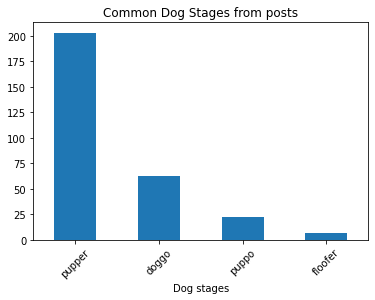

In [182]:
common_dog_stage.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Common Dog Stages from posts')
plt.xlabel('Dog stages')
plt.show()

---

### 2. What are the top ten common names for dogs?

In [183]:
common_names = twt_df_clean[twt_df_clean['name'] !='Nan'].name.value_counts().nlargest(12)
common_names

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Lola        8
Sadie       8
Winston     8
Toby        7
Daisy       7
Koda        6
Name: name, dtype: int64

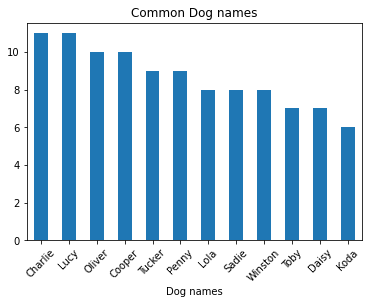

In [184]:
common_names.plot(kind = 'bar')
plt.xticks(rotation=45)
plt.title('Common Dog names')
plt.xlabel('Dog names')
plt.show()

---

### 3. What is the average rating_numerator per dog_stage?

In [187]:
average_rating = main[['tweet_id', 'dog_stage', 'rating_numerator', 'rating_denominator']].groupby('dog_stage').mean()['rating_numerator']
average_rating

dog_stage
doggo      11.870968
floofer    12.000000
pupper     10.636798
puppo      12.000000
Name: rating_numerator, dtype: float64

In [188]:
# Create a variable and store dog_stage value counts
dogs = main.groupby('dog_stage').dog_stage.count()
dogs


dog_stage
doggo       62
floofer      7
pupper     203
puppo       22
Name: dog_stage, dtype: int64

In [189]:
# Creating a function to calculate percentages
def calc_perc(percent, dogs):
    abs_ = int(percent/100.*np.sum(dogs))
    return "{:.2f}%\n({:d})".format(percent, abs_)

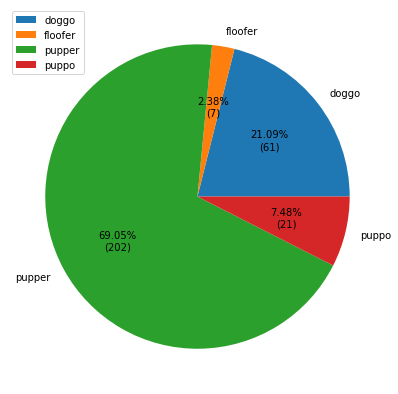

In [190]:
plt.figure(figsize = (7, 7))
plt.pie(dogs, labels = average_rating.index.values, autopct = lambda percent: calc_perc(percent, dogs))
plt.legend()

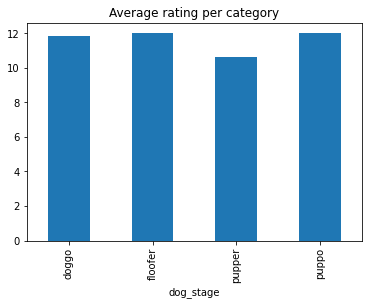

In [191]:
average_rating.plot(kind= 'bar')
plt.title('Average rating per category')
plt.show()

---

### 4. What is the average likes per dog_stage?

In [192]:
average_likes = main[['tweet_id', 'dog_stage', 'favorite_count']].groupby('dog_stage').mean()
average_likes

,favorite_count
dog_stage,
doggo,17598.887097
floofer,11223.142857
pupper,6204.650246
puppo,19574.227273


<AxesSubplot:ylabel='dog_stage'>

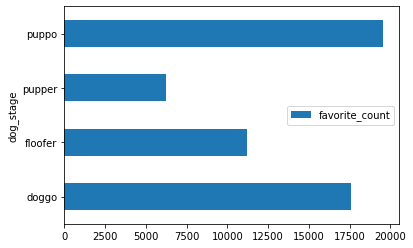

In [193]:
average_likes.plot(kind='barh')

---

### 5. What is the average retweets per dog_stage?

In [194]:
average_retweets = main[['tweet_id', 'dog_stage', 'retweet_count']].groupby('dog_stage').mean()
average_retweets

,retweet_count
dog_stage,
doggo,5972.258065
floofer,3985.000000
pupper,1909.364532
puppo,5325.318182


<AxesSubplot:ylabel='dog_stage'>

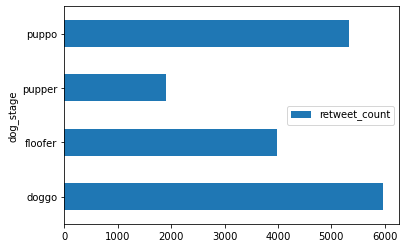

In [195]:
average_retweets.plot(kind='barh')

---

### 6. The most accurate image predictions on first trial?

This is to see what dog is the most correctly predicted on the first trial. The first_prediction_dog must be true.

In [196]:
img = final_df.query('first_prediction_dog == True').first_prediction.value_counts().nlargest(10)

<AxesSubplot:>

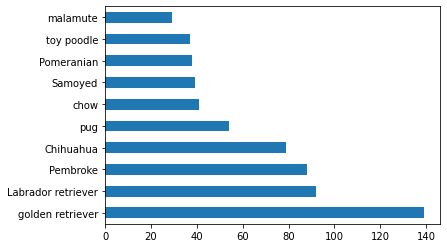

In [197]:
img.plot(kind='barh')


---

<a id='insights'></a>

## Insights

1. Dogs in the pupper stage account for more than 50% of the post. They are the most popular, though they have least average retweets and counts
2. Lucy, Charlie, Oliver and Cooper are the 4 most common names given to a dog. This is according to the dataset, and may not be a proper representation of the population of dogs.
3. Floofer and Puppo take the highest average rating.
3. Puppo and doggo dog stages have the highest likes and retweets in general. Though they interchange their positions as puppo come second in retweets and doggo comes second in likes
4. The most truthfully predicted image of a dog happens to be the Golden Retriever.

## RESOURCES

https://www.geeksforgeeks.org/json-loads-in-python/#:~:text=loads()%20method%20can%20be,JSON%20data%20into%20Python%20Dictionary. <br>
https://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data  <br>
https://www.stackvidhya.com/pandas-change-column-type/  <br>
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id <br>
https://www.geeksforgeeks.org/python-pandas-dataframe-melt/ <br>
